In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
#warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

# Step 1: Create Function for 100 Fair Coin Flips

In [2]:
def coin_flip_100():
    
    num_heads = 0

    for i in np.arange(100):
        coin = make_array('heads', 'tails')
        flip = np.random.choice(coin)

        if flip == 'heads':
            num_heads = num_heads + 1
            
    return num_heads

In [3]:
coin_flip_100()

57

# Step 2: Iterate the experiment many times

## Bad Test Statistic 

Using the raw number of heads is a bad test statistic, since both big and small values favor the alternative hypothesis.

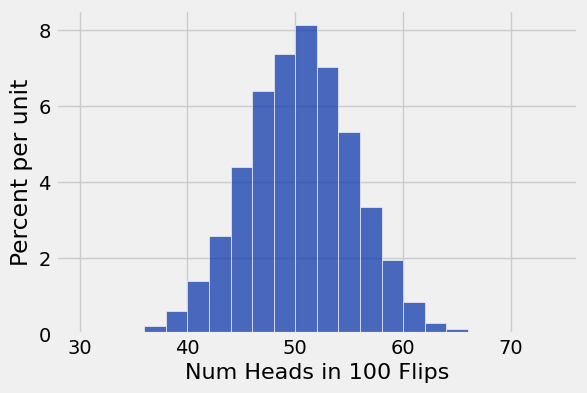

In [11]:
outcomes_array = make_array()

for i in np.arange(10000):
    experimental_outcome = coin_flip_100()
    outcomes_array = np.append(outcomes_array, experimental_outcome)

outcomes_tbl = Table().with_column('Num Heads in 100 Flips', outcomes_array)
outcomes_tbl.hist(bins = np.arange(30,75,2))

## Good Test Statistic

Like total variation distance for categorical distributions, we can use "distance from expectation" as our test statistic.

Small values favor the null hypothesis.

Big values favor the alternative hypothesis.

In [5]:
def coin_dist_from_expectation(num_flips):
    return np.abs(num_flips - 50)

In [6]:
coin_dist_from_expectation(60)

10

In [7]:
statistics_array = make_array()

for i in np.arange(10000):
    experimental_outcome = coin_flip_100()
    statistic = coin_dist_from_expectation(experimental_outcome)
    statistics_array = np.append(statistics_array, statistic)

In [8]:
statistics_array

array([ 3.,  7.,  5., ...,  1.,  3.,  2.])

# Step 3 and 4: Create a table and histogram

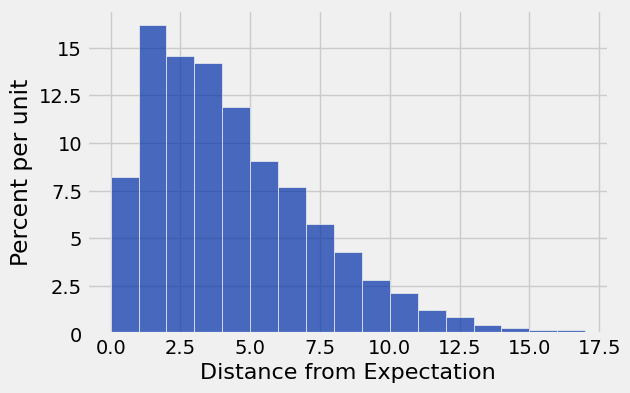

In [9]:
outcomes_tbl = Table().with_columns('Distance from Expectation', statistics_array)
outcomes_tbl.hist(bins = np.arange(0, 18))


## p-value ##

The p-value of a test is the chance, based on the model in the null hypothesis, that the test statistic will be equal to the observed value in the sample or even further in the direction that supports the alternative.

Let's suppose I flipped 65 heads and claimed the coin was fair. What is the p-value of the results of this experimental outcome?

The np.count_nonzero function is useful for this calculation.

In [15]:
# Example: What percent of elements in arr are bigger than or equal to 5?
arr = make_array(1, 2, 3, 3, 4, 5, 5, 6, 6, 6, 7, 8, 9, 9)
num_bigger = np.count_nonzero(arr >= 5)
num_total = len(arr)
percent_bigger = num_bigger / num_total *100
percent_bigger

64.285714285714292

# Practice

Suppose I flipped 65 heads out of 100.

What is the null hypothesis?

What is the alternative hypothesis? 

What is the p-value of this experimental observation (65 heads out of 100)?


In [14]:
num_bigger = np.count_nonzero(statistics_array >= 15)
num_total = len(statistics_array)
percent_bigger = num_bigger / num_total * 100
percent_bigger

0.38

Conventional to say:

p-value less than 0.05 is "statistically significant" evidence for rejecting the null hypothesis.

p-value less than 0.01 is "highly statistically significant" evidence for rejecting the null hypothesis.